In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas.util.testing as tm


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


**TRAIN DATASET**

In [3]:
train=pd.read_csv("/Users/apple/Downloads/DS_Projects/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Finding the NULL values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Percentage of NULL values in train data set
train.isnull().sum()*100/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
#Finding the duplicate rows in the train dataset
duplicate_rows_train=train[train.duplicated()]
duplicate_rows_train.shape

(0, 12)

**Handling Missing Values**

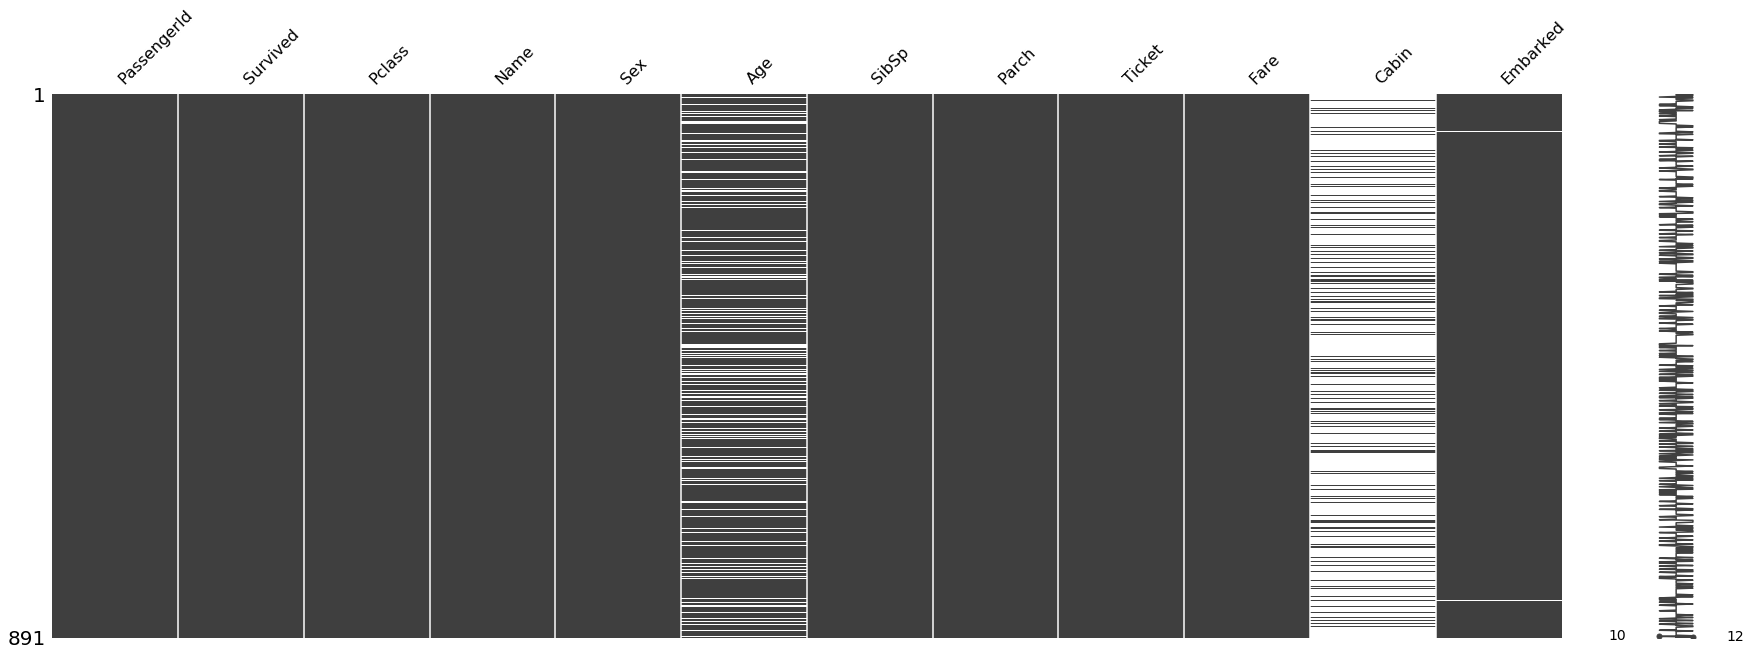

In [10]:
import missingno
missingno.matrix(train, figsize = (30,10))

In [11]:
#Making to new column 'Age Null'. if in Age Null is present then 1 or 0
train['Age_Null']=np.where(train['Age'].isnull(),1,0)

In [12]:
#Finding Median of Age
median=train.Age.median()
median

28.0

In [13]:
#Filling Nan values present in Age with median
train['Age_median']=train['Age'].fillna(median)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0


In [14]:
print(train['Age'].std())
print(train['Age_median'].std())

14.526497332334044
13.019696550973194


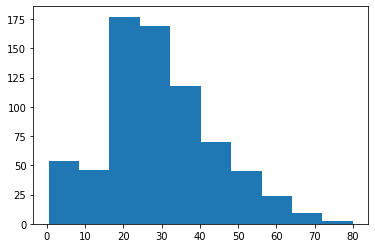

In [15]:
plt.hist(train['Age'])
plt.show()

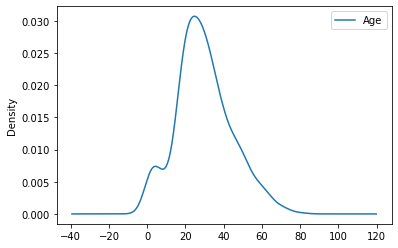

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Age'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

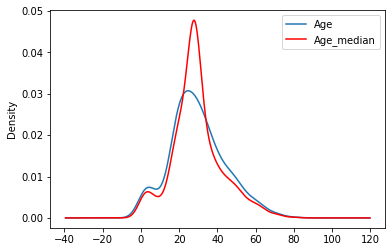

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Age'].plot(kind='kde', ax=ax)
train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [18]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [19]:
impute_nan(train,'Age')

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Null,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0


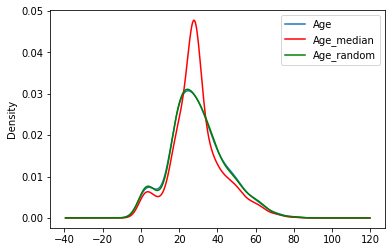

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Age'].plot(kind='kde', ax=ax)
train.Age_median.plot(kind='kde', ax=ax, color='red')
train.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Above plot shows that Variance is more with Age_median , Age and Age_random has no variance.
so it better to do Random Sampling so we dont get much variance with acutal variable and Filled variable

In [22]:
#Making to new column 'cabin Null'. if in Cabin Null is present then 1 or 0
train['Cabin_Null']=np.where(train['Cabin'].isnull(),1,0)

In [23]:
#Filling Nan values present in Cabin with Label "Missing"
train['Cabin'].fillna('Missing',inplace=True)

In [24]:
#Taking only First Letter of the Label in Cabin
train['Cabin']=train['Cabin'].str[0]

In [25]:
train['Cabin'].head()

0    M
1    C
2    M
3    C
4    M
Name: Cabin, dtype: object

In [26]:
#train.Cabin.unique()

In [27]:
#train.groupby(['Cabin'])['Survived'].mean()

In [28]:
#ordinal_labels=train.groupby(['Cabin'])['Survived'].mean().sort_values().index
#ordinal_labels

In [29]:
#enumerate(ordinal_labels,0)

In [30]:
#ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
#ordinal_labels2

In [31]:
#train['Cabin_ordinal_label']=train['Cabin'].map(ordinal_labels2)
#train.head()

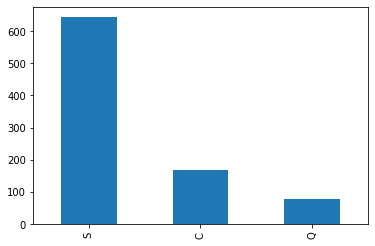

In [32]:
train['Embarked'].value_counts().plot.bar()

In [33]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
#Filling Nan values present in Embarked with Most Common Label "S"
train['Embarked'].fillna('S',inplace=True)

In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Age_Null         0
Age_median       0
Age_random       0
Cabin_Null       0
dtype: int64

In [36]:
#No.of Unique values in train dataset
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin            9
Embarked         3
Age_Null         2
Age_median      88
Age_random      88
Cabin_Null       2
dtype: int64

In [37]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
#train['Age']=train['Age'].astype(int)


In [39]:
# Classifing Age Groups
#def age(df):
#    df.loc[train['Age']<=17,'Age']=1                        #Baby and unmatured
#    df.loc[(train['Age']>17) & (train['Age']<=39),'Age']=2   #Young Age Adult
#    df.loc[(train['Age']>39) & (train['Age']<=59),'Age']=3    #Middle Age Adult
#    df.loc[(train['Age']>59),'Age']=4                    #Old Adult
#    return df
#age(train)

In [40]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Null',
       'Age_median', 'Age_random', 'Cabin_Null'],
      dtype='object')

**BAR PLOTs for Categorical Variables**

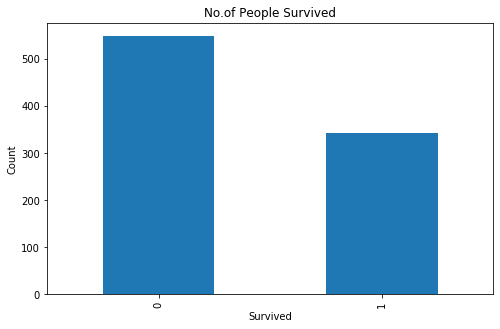

In [41]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
train['Survived'].value_counts().plot.bar()

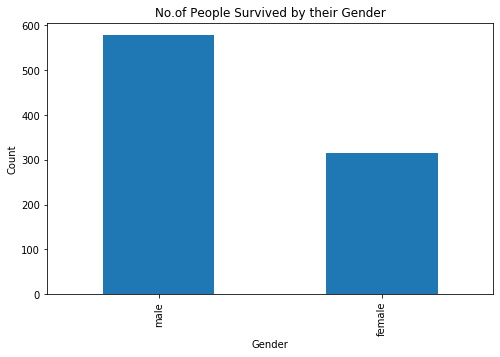

In [42]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
train['Sex'].value_counts().plot.bar()


In [43]:
#Crosstab for no.of people Survived based on Sex 
Sex_survived=pd.crosstab(train.Sex,train.Survived,normalize='index').round(4)*100
Sex_survived

Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


<Figure size 720x360 with 0 Axes>

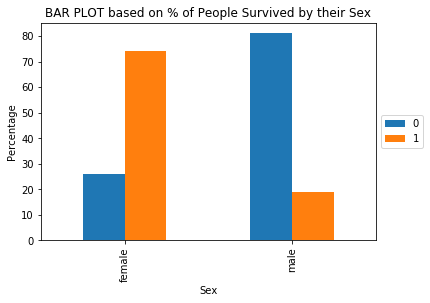

In [44]:
#graph for Survived by Ticket Class
plt.figure(figsize=(10,5))
Sex_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Sex")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

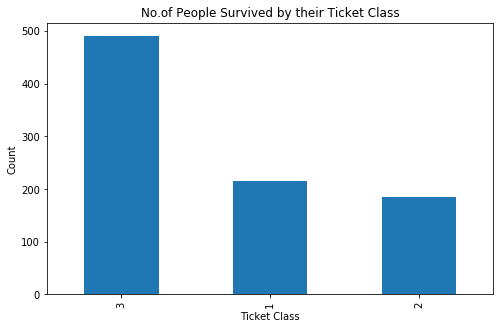

In [45]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
train['Pclass'].value_counts().plot.bar()

In [46]:
#Crosstab for no.of people Survived based on Ticket Class 
Class_survived=pd.crosstab(train.Pclass,train.Survived,normalize='index').round(4)*100
Class_survived

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


<Figure size 720x360 with 0 Axes>

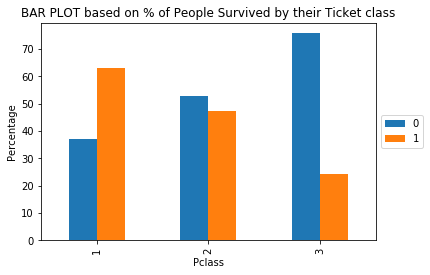

In [47]:
#graph for Survived by Ticket Class
plt.figure(figsize=(10,5))
Class_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Ticket class")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

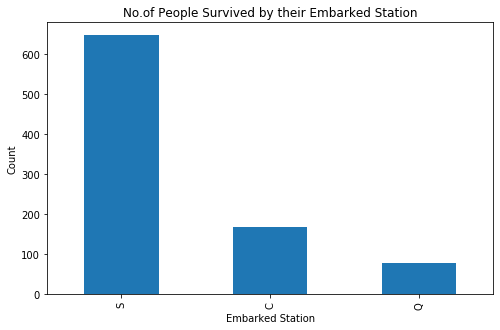

In [48]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Embarked Station')
plt.xlabel('Embarked Station')
plt.ylabel('Count')
train['Embarked'].value_counts().plot.bar()

In [49]:
#Crosstab for no.of people Survived based on Embarked Station 
Embarked_survived=pd.crosstab(train.Embarked,train.Survived,normalize='index').round(4)*100
Embarked_survived

Survived,0,1
Embarked,,
C,44.64,55.36
Q,61.04,38.96
S,66.10,33.90


<Figure size 720x360 with 0 Axes>

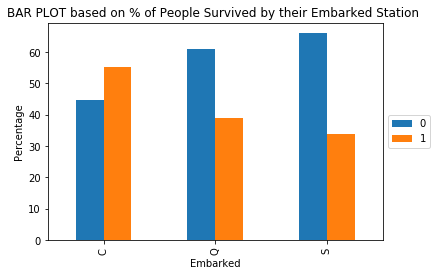

In [50]:
#graph for Survived by Embarked Station 
plt.figure(figsize=(10,5))
Embarked_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Embarked Station ")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

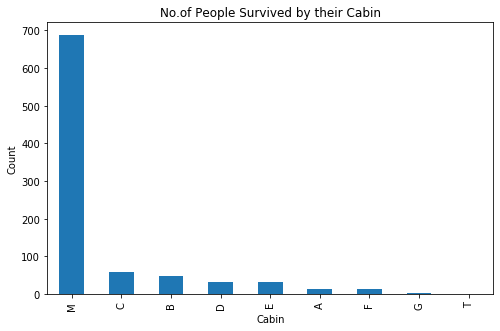

In [51]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
train['Cabin'].value_counts().plot.bar()

In [52]:
#Crosstab for no.of people Survived based Cabin
Cabin_survived=pd.crosstab(train.Cabin,train.Survived,normalize='index').round(4)*100
Cabin_survived

Survived,0,1
Cabin,,
A,53.33,46.67
B,25.53,74.47
C,40.68,59.32
D,24.24,75.76
E,25.00,75.00
F,38.46,61.54
G,50.00,50.00
M,70.01,29.99
T,100.00,0.00


<Figure size 720x360 with 0 Axes>

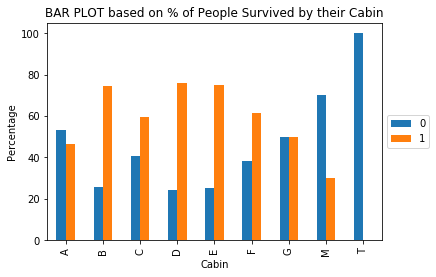

In [53]:
#graph for Survived by Cabin
plt.figure(figsize=(10,5))
Cabin_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Cabin")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

In [54]:
#train['Age']=train['Age'].astype(str)

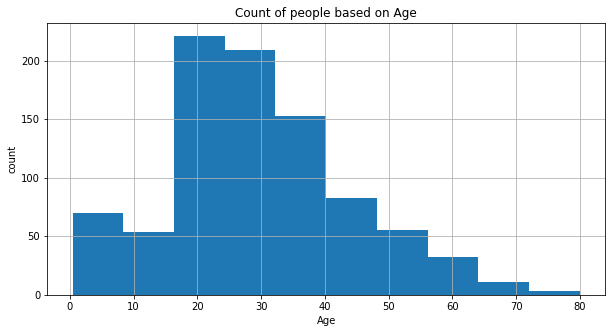

In [55]:
#Histogram of Age 
train['Age_random'].hist(figsize=(10,5))
plt.title("Count of people based on Age")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [56]:
#Crosstab for no.of people Survived based on Age 
Age_survived=pd.crosstab(train.Age_random,train.Survived,normalize='index').round(4)*100
Age_survived

Survived,0,1
Age_random,,
0.42,50.0,50.0
0.67,0.0,100.0
0.75,50.0,50.0
0.83,0.0,100.0
0.92,0.0,100.0
...,...,...
70.00,100.0,0.0
70.50,100.0,0.0
71.00,100.0,0.0


<Figure size 1800x1080 with 0 Axes>

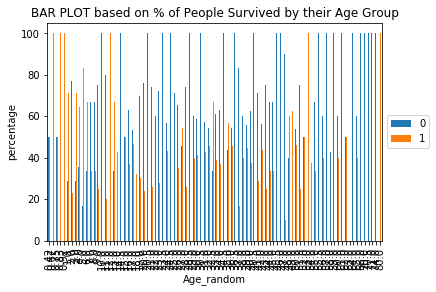

In [57]:
#graph for Survived by Age
plt.figure(figsize=(25,15))
Age_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Age Group")
plt.ylabel('percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Checking NORMAL DISTRIBUTION

In [58]:
import scipy.stats as stat
import pylab

In [59]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

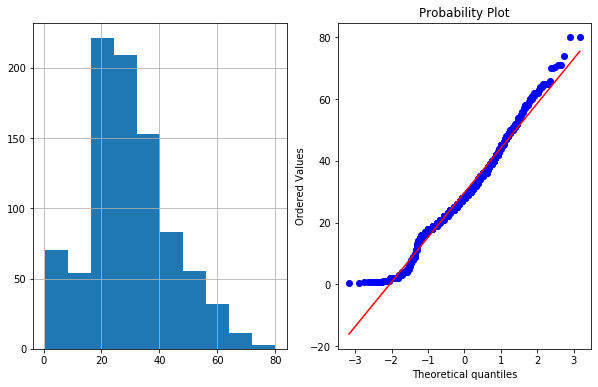

In [60]:
plot_data(train,'Age_random')

In [61]:
# BOXCOX TRANSFORMATION ON Age

In [62]:
#train['Age_random'],parameters=stat.boxcox(train['Age_random'])
#plot_data(train,'Age_random')

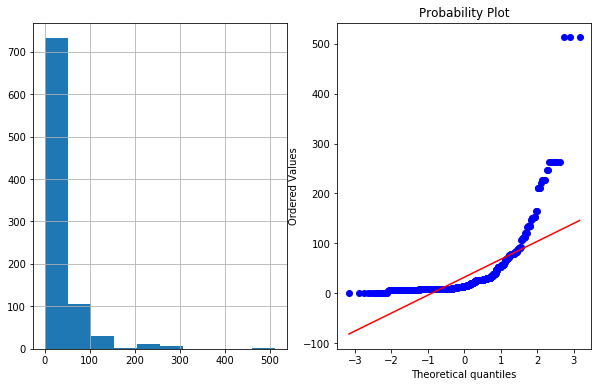

In [63]:
plot_data(train,'Fare')

In [64]:
# BOXCOX TRANSFORMATION ON Fare

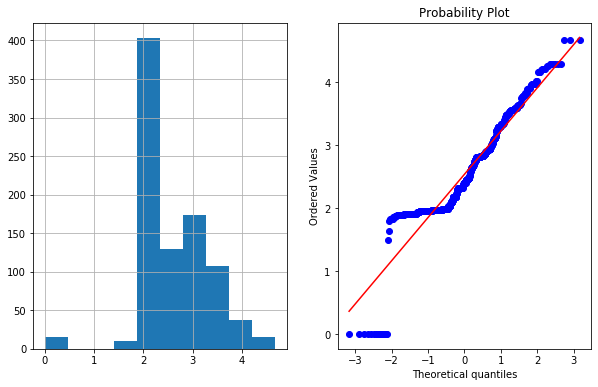

In [65]:
train['Fare'],parameters=stat.boxcox(train['Fare']+1)
plot_data(train,'Fare')

In [66]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train['Cabin']=labelencoder.fit_transform(train['Cabin'])


In [67]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Null',
       'Age_median', 'Age_random', 'Cabin_Null'],
      dtype='object')

In [68]:
# create dummy variables for multiple categories
# drop_first=True handles k - 1
# this drops original Sex and Embarked columns
# and creates dummy variables

train1=pd.get_dummies(train, columns=['Sex', 'Embarked','Pclass'], drop_first=True)

In [69]:
train1.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Null,Age_median,Age_random,Cabin_Null,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1.906724,7,0,22.0,22.0,1,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,3.497640,2,0,38.0,38.0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,1.970459,7,0,26.0,26.0,1,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.304258,2,0,35.0,35.0,0,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,1.981680,7,0,35.0,35.0,1,1,0,1,0,1


In [70]:
train1.drop(['PassengerId','Name','Ticket','Age','Age_median'],axis=1,inplace=True)

In [71]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    int64  
 5   Age_Null    891 non-null    int64  
 6   Age_random  891 non-null    float64
 7   Cabin_Null  891 non-null    int64  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
 11  Pclass_2    891 non-null    uint8  
 12  Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 60.2 KB


In [72]:
train1.isnull().sum()

Survived      0
SibSp         0
Parch         0
Fare          0
Cabin         0
Age_Null      0
Age_random    0
Cabin_Null    0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

In [73]:
train1.columns

Index(['Survived', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Age_Null', 'Age_random',
       'Cabin_Null', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [74]:
#columns_to_convert=['Survived', 'Pclass', 'Sex', 'Age',  'Cabin','Embarked','Age_Null', 'Cabin_Null']
#for i in columns_to_convert:
#    train[i]=train[i].astype(str)

In [75]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    int64  
 5   Age_Null    891 non-null    int64  
 6   Age_random  891 non-null    float64
 7   Cabin_Null  891 non-null    int64  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
 11  Pclass_2    891 non-null    uint8  
 12  Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 60.2 KB


**TEST DATASET**

In [76]:
test=pd.read_csv("/Users/apple/Downloads/DS_Projects/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
test.shape

(418, 11)

In [78]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [80]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [81]:
#Percentage of NULL values in test data set
test.isnull().sum()*100/len(test)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [82]:
#Finding the duplicate rows in test dataset 
duplicate_rows_test=test[test.duplicated()]
duplicate_rows_test.shape

(0, 11)

In [83]:
#Making to new column 'Age Null'. if in Age Null is present then 1 or 0
test['Age_Null']=np.where(test['Age'].isnull(),1,0)

In [84]:
#Finding Median of Age
median=test.Age.median()
median

27.0

In [85]:
#Filling Nan values present in Age with median
test['Age_median']=test['Age'].fillna(median)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Null,Age_median
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,22.0


In [86]:
impute_nan(test,'Age')

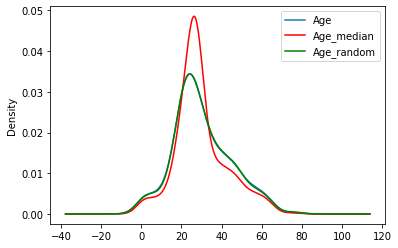

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
test['Age'].plot(kind='kde', ax=ax)
test.Age_median.plot(kind='kde', ax=ax, color='red')
test.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [88]:
#creating cabin_null by cabin if null is ture 1 or 0
test['Cabin_Null']=np.where(test['Cabin'].isnull(),1,0)

In [89]:
#Filling Nan values present in Cabin with Label "Missing"
test['Cabin'].fillna('Missing',inplace=True)

In [90]:
test['Cabin']=test['Cabin'].astype(str).str[0]


In [91]:
test['Fare'].median()

14.4542

In [92]:
test['Fare'].fillna(14.4542,inplace=True)

In [93]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Age_Null        0
Age_median      0
Age_random      0
Cabin_Null      0
dtype: int64

In [94]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [95]:
#test['Age']=test['Age'].astype(int)

In [96]:
# Classifing Age Groups
#def age(df):
#    df.loc[test['Age']<=17,'Age']=1                        #Baby and unmatured
#    df.loc[(test['Age']>17) & (test['Age']<=39),'Age']=2   #Young Age Adult
#    df.loc[(test['Age']>39) & (test['Age']<=59),'Age']=3    #Middle Age Adult
#    df.loc[(test['Age']>59),'Age']=4                    #Old Adult
#    return df
#age(test)

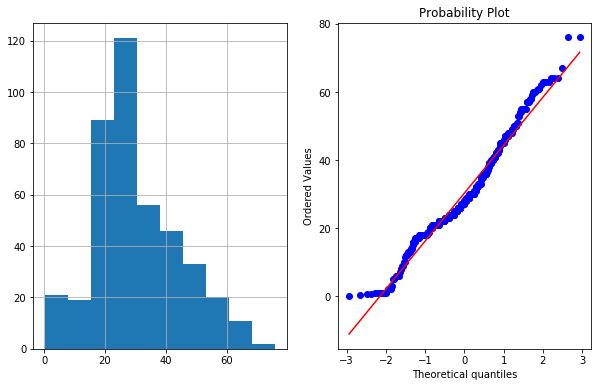

In [97]:
plot_data(test,'Age_random')

In [98]:
# BOXCOX TRANSFORMATION ON Age

In [99]:
#test['Age_random'],parameters=stat.boxcox(test['Age_random'])
#plot_data(test,'Age_random')

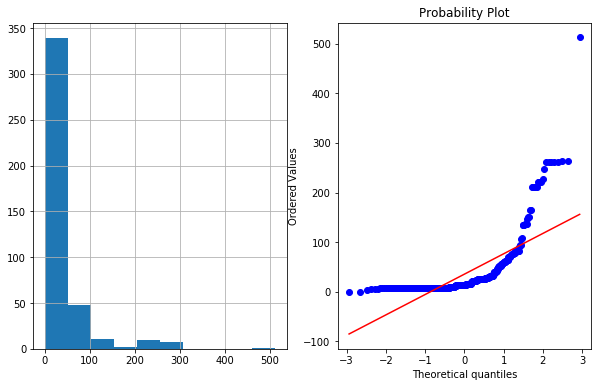

In [100]:
plot_data(test,'Fare')

In [101]:
# BOXCOX TRANSFORMATION ON Fare

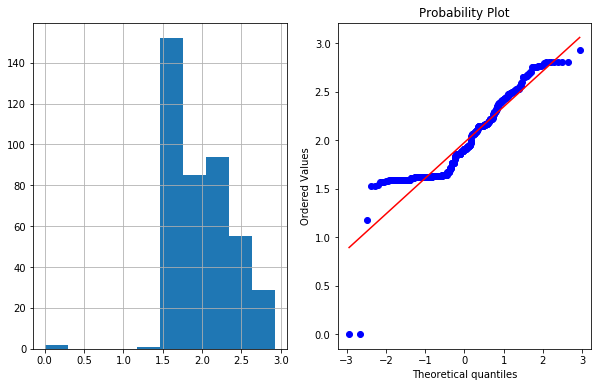

In [102]:
test['Fare'],parameters=stat.boxcox(test['Fare']+1)
plot_data(test,'Fare')

In [103]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
test['Cabin']=labelencoder.fit_transform(test['Cabin'])


In [104]:
# create dummy variables for multiple categories
# drop_first=True handles k - 1
# this drops original Sex and Embarked columns
# and creates dummy variables

test1=pd.get_dummies(test, columns=['Sex', 'Embarked','Pclass'], drop_first=True)
test1

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Null,Age_median,Age_random,Cabin_Null,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,1.625896,7,0,34.5,34.5,1,1,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,1.571897,7,0,47.0,47.0,1,0,0,1,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,1.726292,7,0,62.0,62.0,1,1,1,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,1.673976,7,0,27.0,27.0,1,1,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,1.834314,7,0,22.0,22.0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,1.639187,7,1,27.0,25.0,1,1,0,1,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,2.599186,2,0,39.0,39.0,0,0,0,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,1.588907,7,0,38.5,38.5,1,1,0,1,0,1
416,1308,"Ware, Mr. Frederick",NaN,0,0,359309,1.639187,7,1,27.0,29.0,1,1,0,1,0,1


In [105]:
#Removing Unwanted Columns
test1=test1.drop(['Name','Ticket','PassengerId','Age','Age_median'],axis=1)

In [106]:
test1.head()

,SibSp,Parch,Fare,Cabin,Age_Null,Age_random,Cabin_Null,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,1.625896,7,0,34.5,1,1,1,0,0,1
1,1,0,1.571897,7,0,47.0,1,0,0,1,0,1
2,0,0,1.726292,7,0,62.0,1,1,1,0,1,0
3,0,0,1.673976,7,0,27.0,1,1,0,1,0,1
4,1,1,1.834314,7,0,22.0,1,0,0,1,0,1


In [107]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SibSp       418 non-null    int64  
 1   Parch       418 non-null    int64  
 2   Fare        418 non-null    float64
 3   Cabin       418 non-null    int64  
 4   Age_Null    418 non-null    int64  
 5   Age_random  418 non-null    float64
 6   Cabin_Null  418 non-null    int64  
 7   Sex_male    418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
 10  Pclass_2    418 non-null    uint8  
 11  Pclass_3    418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 25.0 KB


In [108]:
#columns_to_convert=[ 'Pclass', 'Sex', 'Age',  'Cabin','Embarked','Age_Null', 'Cabin_Null']
#for i in columns_to_convert:
#    test[i]=test[i].astype(str)

# ****Spliting Independent and Dependent Variables****

In [109]:
train1.head()

,Survived,SibSp,Parch,Fare,Cabin,Age_Null,Age_random,Cabin_Null,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,0,1.906724,7,0,22.0,1,1,0,1,0,1
1,1,1,0,3.497640,2,0,38.0,0,0,0,0,0,0
2,1,0,0,1.970459,7,0,26.0,1,0,0,1,0,1
3,1,1,0,3.304258,2,0,35.0,0,0,0,1,0,0
4,0,0,0,1.981680,7,0,35.0,1,1,0,1,0,1


In [110]:
train1_y=train1.iloc[:,:1]
train1_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [111]:
train1_x=train1.iloc[:,1:]
train1_x.head()

,SibSp,Parch,Fare,Cabin,Age_Null,Age_random,Cabin_Null,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,1.906724,7,0,22.0,1,1,0,1,0,1
1,1,0,3.497640,2,0,38.0,0,0,0,0,0,0
2,0,0,1.970459,7,0,26.0,1,0,0,1,0,1
3,1,0,3.304258,2,0,35.0,0,0,0,1,0,0
4,0,0,1.981680,7,0,35.0,1,1,0,1,0,1


In [112]:
train1_x['Age_random'].describe()

count    891.000000
mean      29.700348
std       14.563654
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age_random, dtype: float64

In [113]:
train1_x['Fare'].describe()

count    891.000000
mean       2.537799
std        0.718497
min        0.000000
25%        1.969136
50%        2.402006
75%        2.939543
max        4.671393
Name: Fare, dtype: float64

In [114]:
train1_x.shape

(891, 12)

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# LogisticRegression

In [116]:
# Create a pipeline
pipe = Pipeline([("scaler",StandardScaler()),("classifier", LogisticRegression())])
# Create dictionary with LR learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,30,40,50,55,100]
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,30,40,50,55,100],
                 "classifier__solver":['newton-cg','saga','sag','liblinear','lbfgs'] ##This solvers don't allow L1 penalty
                 },
                ]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
LR_model = gridsearch.fit(train1_x,train1_y)

In [117]:
print(gridsearch.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=5))])


In [118]:
y_pred=gridsearch.predict(test1)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [119]:
general=pd.read_csv("/Users/apple/Downloads/DS_Projects/titanic/gender_submission.csv")
general.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [120]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [121]:
#confusion matrix
confusion_matrix(general['Survived'],y_pred)

array([[261,   5],
       [ 20, 132]])

In [122]:
from sklearn.metrics import accuracy_score
LR_score=accuracy_score(general['Survived'],y_pred,normalize=True)
LR_score

0.9401913875598086

# K-NN Classifier

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
# Create a pipeline
KNN_pipe = Pipeline([("scaler",StandardScaler()),("KNNC", KNeighborsClassifier())])
# Create dictionary with KNN learning algorithms and their hyperparameters
grid_param = [{"KNNC": [KNeighborsClassifier()],
               "KNNC__n_neighbors":list(range(1,50)),
               "KNNC__leaf_size":list(range(1,30)),
               "KNNC__p":[1,2]
                 }]
# create a gridsearch of the pipeline, the fit the best model
gridsearch1 = GridSearchCV(KNN_pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
KNN_model = gridsearch1.fit(train1_x,train1_y)

In [125]:
print(gridsearch1.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('KNNC', KNeighborsClassifier(leaf_size=12, n_neighbors=12))])


In [126]:
y_pred1=gridsearch1.predict(test1)
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [127]:
#confusion matrix
confusion_matrix(general['Survived'],y_pred1)

array([[247,  19],
       [ 44, 108]])

In [128]:
KNN_score=accuracy_score(general['Survived'],y_pred1)
KNN_score

0.8492822966507177

# SVM

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [130]:
# Create a pipeline
SVC_pipe = Pipeline([("scaler",StandardScaler()),("SVC", SVC())])
# Create dictionary with KNN learning algorithms and their hyperparameters
grid_param = [{"SVC": [SVC()],
               "SVC__C": [1,2,3,4],
               "SVC__kernel":['linear','poly','rbf'],
                 }]
# create a gridsearch of the pipeline, the fit the best model
randomsearch = GridSearchCV(SVC_pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
SVC_model = randomsearch.fit(train1_x,train1_y)


In [131]:
print(randomsearch.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(C=1))])


In [132]:
y_pred2=randomsearch.predict(test1)
y_pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [133]:
#confusion matrix
confusion_matrix(general['Survived'],y_pred2)

array([[255,  11],
       [ 37, 115]])

In [134]:
SVC_score=accuracy_score(general['Survived'],y_pred2)
SVC_score

0.8851674641148325

In [135]:
##Create Sample Submission file
#pred=pd.DataFrame(ann_pred)
#sub_df=pd.read_csv('sample_submission.csv')
#datasets=pd.concat([sub_df['Id'],pred],axis=1)
#datasets.columns=['Id','SalePrice']
#datasets.to_csv('sample_submission.csv',index=False)

cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)